In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv("assets/Iris.csv")

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

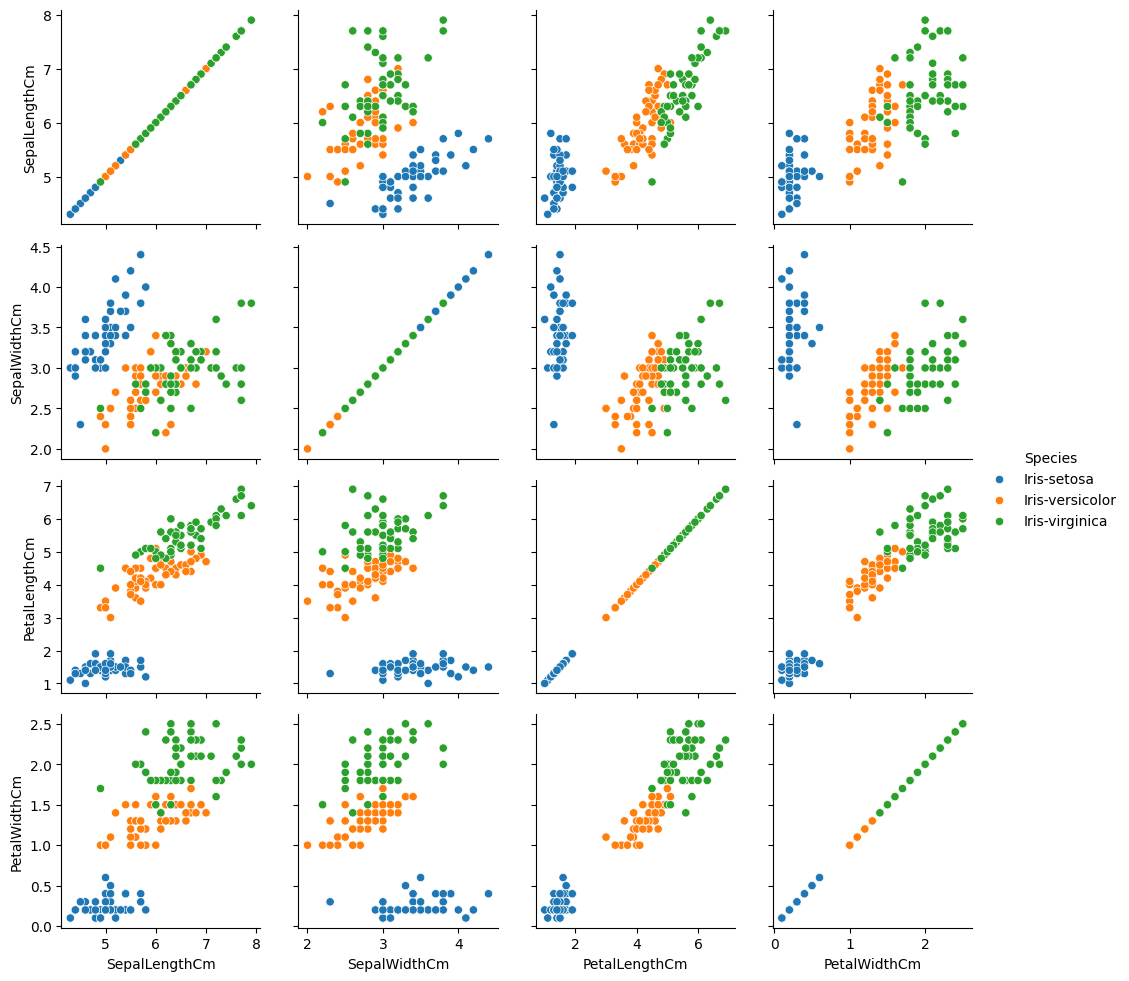

In [6]:
# iris = sns.load_dataset("iris")
g = sns.PairGrid(
    data=df,
    vars=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"],
    hue="Species",
)
g.map(sns.scatterplot)
g.add_legend()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
unique_map = {
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2,
}
arr = np.array(df)
arr
print(np.unique(arr[:, 5]))
for i in arr:
    i.put(5, unique_map[i[-1]])
# arr

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [63]:
rnt = np.random.RandomState(123)
arr = rnt.permutation(arr)

In [ ]:
split_size = int(len(arr) * 0.8)
X = arr[:split_size]
y = arr[split_size:]

In [ ]:
X_train = np.array(X[:, 3:5], dtype=float)
X_test = np.array(X[:, 5], dtype=int)

y_train = np.array(y[:, 3:5], dtype=float)
y_test = np.array(y[:, 5], dtype=int)

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X=X_train, y=X_test)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [98]:
model.predict(y_train)

array([2, 2, 2, 2, 0, 1, 0, 1, 1, 0, 1, 2, 1, 2, 2, 0, 1, 0, 2, 2, 1, 1,
       2, 1, 2, 0, 1, 1, 2, 2])

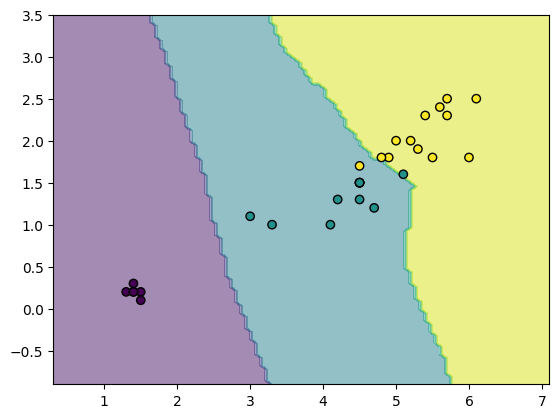

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay


disp = DecisionBoundaryDisplay.from_estimator(
    model, y_train, response_method="predict", alpha=0.5
)
disp.ax_.scatter(y_train[:, 0], y_train[:, 1], c=y_test, edgecolor="k")
plt.show()

In [ ]:
accuracy = (sum(model.predict(y_train) == y_test) / len(y_test)) * 100
print(f"Accuracy: {accuracy:.2f} %")

Accuracy: 93.33 %


In [127]:
y_train[0]

array([5.7, 2.3])

In [133]:
model.predict([y_train[-1]])

array([2])

SKlearn Way


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X = df[["PetalLengthCm", "PetalWidthCm"]]
y = le.fit_transform(df["Species"])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123, shuffle=True
)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [27]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


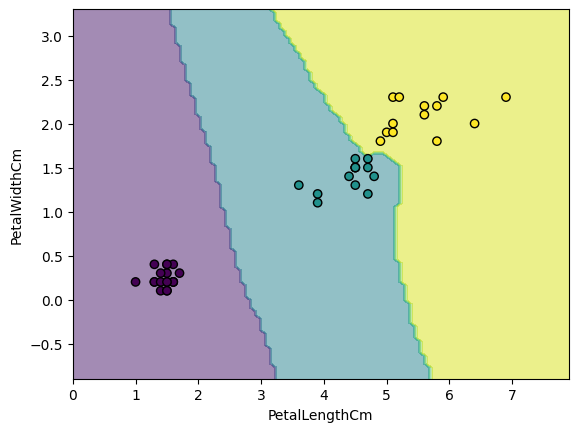

In [28]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay


disp = DecisionBoundaryDisplay.from_estimator(
    model,
    X_test,
    response_method="predict",
    alpha=0.5,
)
disp.ax_.scatter(
    X_test["PetalLengthCm"],
    X_test["PetalWidthCm"],
    c=y_test,
    edgecolor="k",
)
plt.show()

In [29]:
accuracy = (sum(model.predict(X_test) == y_test) / len(y_test)) * 100
print(f"Accuracy: {accuracy:.2f} %")

Accuracy: 100.00 %


In [30]:
model.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

$$
\int \oint \sum \prod
\alpha \beta \gamma \rho \sigma \delta \epsilon
$$